In [ ]:
!pip install imbalanced-learn

In [ ]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

In [ ]:
test_data = pd.read_csv('/content/LargeTest.csv')
train_data = pd.read_csv('/content/LargeTrain.csv')
smote = SMOTE(random_state=42)

EDA Train data

In [ ]:
train_data.isnull().sum().sum()

586

In [ ]:
test_data.isnull().sum().sum()

1540

In [ ]:
train_data.describe()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,Class
count,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,...,4136.000000,4136.000000,4136.000000,4136.000000,4136.00000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000
mean,3.268552,3.446942,2078.447909,11.696640,4.941987,1297.281122,3.880590,17.135606,5.573846,31.642011,...,11028.874033,5152.321325,19468.893375,4922.861944,13198.11146,19617.001451,7194.729691,67509.625484,54293.319632,3.990571
std,0.850623,2.298589,6421.451945,8.977786,2.680075,4121.208361,2.915767,25.771120,7.622083,39.937012,...,18703.909585,4217.945814,24066.464474,4056.748697,10679.33600,25058.545103,6015.395215,66409.011804,53107.248896,2.682589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,3.000000,50.000000,6.000000,4.000000,36.000000,2.000000,6.000000,0.000000,13.000000,...,1181.000000,1396.000000,3392.500000,1202.500000,3176.00000,3242.750000,2088.000000,12396.750000,7988.750000,2.000000
50%,3.000000,3.000000,506.000000,12.000000,4.000000,363.000000,4.000000,11.000000,4.000000,18.000000,...,5608.500000,5477.000000,14985.500000,5358.500000,14911.00000,15004.500000,7473.500000,67525.500000,48598.500000,3.000000
75%,3.000000,4.000000,1574.000000,16.000000,6.000000,1030.000000,5.000000,17.000000,9.000000,33.000000,...,7764.750000,6048.000000,21967.000000,6030.000000,16075.25000,20606.500000,8349.500000,73407.000000,68585.000000,6.000000
max,16.000000,90.000000,107775.000000,85.000000,58.000000,86560.000000,21.000000,377.000000,124.000000,492.000000,...,161581.000000,23009.000000,197903.000000,24965.000000,62072.00000,196397.000000,36010.000000,388947.000000,300241.000000,9.000000


In [ ]:
train_data['Class'].value_counts()

3    2942
2    2478
1    1541
8    1228
9    1013
6     751
4     475
7     398
5      42
Name: Class, dtype: int64

In [ ]:
print(test_data.head())

In [ ]:
X = train_data.drop('Class', axis=1)  # Características
y = train_data['Class']              # Etiquetas

In [ ]:
X_test = test_data.values

In [ ]:
# Opcional: Normalizar X_train si es necesario
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((8694, 1804), (2174, 1804), (8694,), (2174,))

In [ ]:
class_distribution_smote = pd.Series(y_train_smote).value_counts()

class_distribution_smote

2.0    940
3.0    940
8.0    940
9.0    940
1.0    940
4.0    940
7.0    940
6.0    940
5.0    940
Name: Class, dtype: int64

In [ ]:
model = Sequential()
# Primera capa oculta
model.add(Dense(512, activation='relu', input_shape=(X_train_smote.shape[1],)))
# Posiblemente más capas ocultas
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Capa de salida
model.add(Dense(9, activation='softmax'))  # Usar '9' si hay 9 clases distintas

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train_smote_adjusted = y_train_smote - 1
y_test_adjusted = y_test - 1

# Luego, puedes entrenar tu modelo como lo estabas haciendo:
model.fit(X_train_smote, y_train_smote_adjusted, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
212/212 [==============================] - 5s 18ms/step - loss: 0.1418 - accuracy: 0.9696 - val_loss: 0.0275 - val_accuracy: 0.9935
Epoch 2/10
212/212 [==============================] - 4s 17ms/step - loss: 0.0397 - accuracy: 0.9931 - val_loss: 0.0610 - val_accuracy: 0.9959
Epoch 3/10
212/212 [==============================] - 3s 15ms/step - loss: 0.0383 - accuracy: 0.9947 - val_loss: 0.0405 - val_accuracy: 0.9959
Epoch 4/10
212/212 [==============================] - 3s 14ms/step - loss: 0.0272 - accuracy: 0.9969 - val_loss: 0.0120 - val_accuracy: 0.9976
Epoch 5/10
212/212 [==============================] - 3s 16ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0082 - val_accuracy: 0.9970
Epoch 6/10
212/212 [==============================] - 4s 19ms/step - loss: 0.0525 - accuracy: 0.9941 - val_loss: 0.0271 - val_accuracy: 0.9911
Epoch 7/10
212/212 [==============================] - 3s 14ms/step - loss: 0.0245 - accuracy: 0.9950 - val_loss: 0.0216 - val_accuracy: 0.9965

In [ ]:
# Hacer predicciones con el modelo
predictions = model.predict(X_test)

# 'predictions' contendrá las probabilidades de clase predichas por tu modelo

68/68 [==============================] - 0s 4ms/step


68/68 [==============================] - 0s 7ms/step


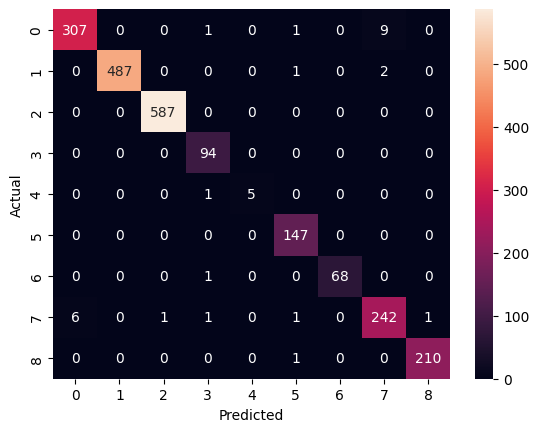

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test_adjusted, y_pred_classes)

# Visualización
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Convertir predicciones probabilísticas en etiquetas de clase (si es necesario)
# Si tus predicciones ya están en forma de etiquetas de clase, puedes omitir este paso
predicted_labels = predictions.argmax(axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_adjusted, y_pred_classes)

# Calcular precisión, recuperación y puntuación F1
precision = precision_score(y_test_adjusted, predicted_labels, average='weighted') # Usa 'micro', 'macro', o 'weighted' según tu caso
recall = recall_score(y_test_adjusted, predicted_labels, average='weighted')
f1 = f1_score(y_test_adjusted, predicted_labels, average='weighted')

# Imprimir las métricas
print("Matriz de Confusión:\n", conf_matrix)
print("Precisión: {:.2f}".format(precision))
print("Recuperación: {:.2f}".format(recall))
print("Puntuación F1: {:.2f}".format(f1))

Matriz de Confusión:
 [[307   0   0   1   0   1   0   9   0]
 [  0 487   0   0   0   1   0   2   0]
 [  0   0 587   0   0   0   0   0   0]
 [  0   0   0  94   0   0   0   0   0]
 [  0   0   0   1   5   0   0   0   0]
 [  0   0   0   0   0 147   0   0   0]
 [  0   0   0   1   0   0  68   0   0]
 [  6   0   1   1   0   1   0 242   1]
 [  0   0   0   0   0   1   0   0 210]]
Precisión: 0.99
Recuperación: 0.99
Puntuación F1: 0.99


In [ ]:
model.save('mi_modelo.h5')  # Guarda el modelo en el formato HDF5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
